# Percolation - Complex Charbonneau

## 1D

número médio de ocupação $<n>$, dado que a ocupação de uma célula é dada independentemente por probabilidade $p$ 
para $<n> = pN$

probability of having at least one cluster of length s is:

$ P[legthn(lattice)=s] = p^s (1-p)^2$

Considere o tamanho do maior cluster!

$S = max(s_k)$

No limite $N \rightarrow \infty$ é possível mostrar que o tamanho do maior cluster cresce segundo a seguinte regra

$\lim_{N \rightarrow \infty} S= \frac{1+p}{1-p}$



o valor numérico de p onde o S tende ao tamanho do sistema  é o ${ percolation \, threshhold} \, p_c$

Charbonneau says: "For 1-D lattices, pc = 1 for the very simple reason that only one empty lattice node is enough to “break” the infinite cluster. This conclusion would have been easy to anticipate without all this probabilistic mumbo jumbo, but it was important to go through it nonetheless, because things become a lot trickier—and complex!—for lattices in more than one spatial dimension."

## 2D

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [8]:
np.random.seed(1234)

N=128

p1=0.59

p2=0.9

p3=0.1

In [9]:
lattice1 = np.zeros([N,N], dtype='int')
lattice2 = np.zeros([N,N], dtype='int')
lattice3 = np.zeros([N,N], dtype='int')

for i in range(0,N):
    for j in range(0,N):
        if np.random.uniform() < p1:
            lattice1[i,j]=1
            
for i in range(0,N):
    for j in range(0,N):
        if np.random.uniform() < p2:
            lattice2[i,j]=1

for i in range(0,N):
    for j in range(0,N):
        if np.random.uniform() < p3:
            lattice3[i,j]=1

In [46]:
def generate_lattice(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice


<function matplotlib.pyplot.show(*args, **kw)>

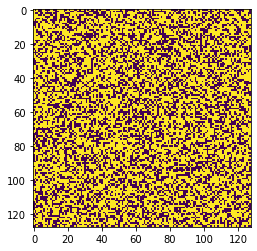

In [10]:
plt.imshow(lattice1, interpolation="nearest")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

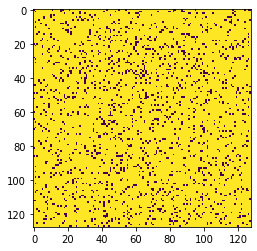

In [11]:
plt.imshow(lattice2, interpolation="nearest")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

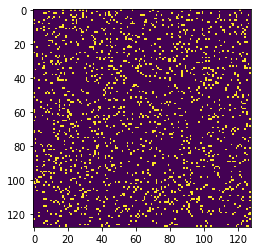

In [12]:
plt.imshow(lattice3, interpolation="nearest")
plt.show

In [45]:
def findcluster(N,lattice):
    dx,dy=np.array([-1,0,1,0]), np.array([0,1,0,1])
    size_cluster = np.zeros(int(N*N/2),dtype='int')
    tag_cluster = np.zeros(int(N*N/2),dtype='int')
    map_cluster = np.zeros([N+2,N+2],dtype='int')
    map_cluster[1:N+1,1:N+1]= lattice[:,:]
    n_cluster, iic=0,100
    
    for j in range(1,N+1):
        for k in range(1,N+1):
            size, add_to_size = 0,0
            
            if map_cluster[j,k] == 1:
                map_cluster[j,k]= iic
                size = size + 1
                add_to_size = add_to_size + 1
                
                while(add_to_size >0):
                    add_to_size = 0
                    j1,j2=j,min(N,j+size)
                    k1,k2= max(1,k-size), min(N,k+size)
                    for jj in range(j1,j2+1):
                        for kk in range(k1,k2+1):
                            if map_cluster[jj,kk] ==1:
                                if iic in map_cluster[jj+dx[:],kk+dy[:]]:
                                        map_cluster[jj,kk]=iic
                                        size=size +1
                                        add_to_size+=1
                size_cluster[n_cluster] = size
                tag_cluster[n_cluster] = iic
                #print("cluster tag {}, size {}.".format(iic,size))
                iic = np.random.random_integers(10,250)
                n_cluster = n_cluster + 1
    plt.imshow(map_cluster, interpolation = "nearest")
    plt.show()
    return n_cluster, size_cluster, tag_cluster


def findcluster_noplot(N,lattice):
    dx,dy=np.array([-1,0,1,0]), np.array([0,1,0,1])
    size_cluster = np.zeros(int(N*N/2),dtype='int')
    tag_cluster = np.zeros(int(N*N/2),dtype='int')
    map_cluster = np.zeros([N+2,N+2],dtype='int')
    map_cluster[1:N+1,1:N+1]= lattice[:,:]
    n_cluster, iic=0,100
    
    for j in range(1,N+1):
        for k in range(1,N+1):
            size, add_to_size = 0,0
            
            if map_cluster[j,k] == 1:
                map_cluster[j,k]= iic
                size = size + 1
                add_to_size = add_to_size + 1
                
                while(add_to_size >0):
                    add_to_size = 0
                    j1,j2=j,min(N,j+size)
                    k1,k2= max(1,k-size), min(N,k+size)
                    for jj in range(j1,j2+1):
                        for kk in range(k1,k2+1):
                            if map_cluster[jj,kk] ==1:
                                if iic in map_cluster[jj+dx[:],kk+dy[:]]:
                                        map_cluster[jj,kk]=iic
                                        size=size +1
                                        add_to_size+=1
                size_cluster[n_cluster] = size
                tag_cluster[n_cluster] = iic
                #print("cluster tag {}, size {}.".format(iic,size))
                iic = np.random.random_integers(10,250)
                n_cluster = n_cluster + 1
    #plt.imshow(map_cluster, interpolation = "nearest")
    #plt.show()
    return n_cluster, size_cluster, tag_cluster

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: This function is deprecated. Please call randint(10, 250 + 1) instead


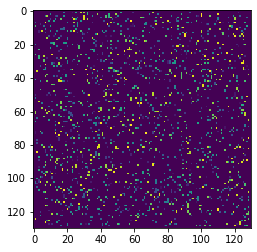

1453 [1 1 1 ... 0 0 0] [100  16 147 ...   0   0   0]


In [40]:
n_cluster3, size_cluster3, tag_cluster3 = findcluster(N,lattice3)

In [43]:
print(n_cluster3, size_cluster3, tag_cluster3)
print(max(size_cluster3))

1453 [1 1 1 ... 0 0 0] [100  16 147 ...   0   0   0]
5


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: This function is deprecated. Please call randint(10, 250 + 1) instead


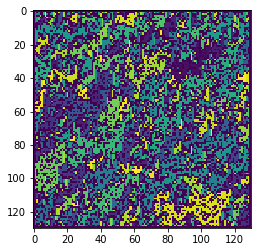

In [32]:
n_cluster1, size_cluster1, tag_cluster1 = findcluster(N,lattice1)

In [42]:
print(n_cluster1, size_cluster1, tag_cluster1)

print(max(size_cluster1))

1768 [7 3 2 ... 0 0 0] [100 109 163 ...   0   0   0]
303


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: This function is deprecated. Please call randint(10, 250 + 1) instead


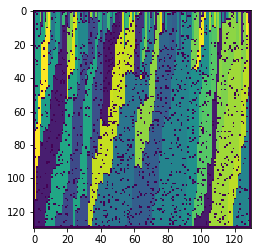

In [33]:
n_cluster2, size_cluster2, tag_cluster2 = findcluster(N,lattice2)

In [44]:
print(n_cluster2, size_cluster2, tag_cluster2)
print(max(size_cluster2))

133 [ 1 50  6 ...  0  0  0] [100 219 118 ...   0   0   0]
1435


$f(p) = \frac{S(p)}{p N^2}$

 $S(p_c) = \frac{1}{2} p_c N^2$

Charbonneau says

" The power-law index α = 1.85 is said to be universal for this class of 2-D Cartesian lattices with 4-nearest-neighbor connectivity."

Scale invariance! power-law

"Clusters are indeed fractal objects, with a dimension somewhere between 1 and 2. Their fractal index varies with the occupation probability p, the numerical value being smallest at the percolation threshold. Because of their highly irregular shape, the fractal dimension of clusters is best computed using the box- counting method introduced in section 3.5."

"The implied scale invariance holds important clues to the underlying dynamical processes driving these events"

"scale invariance will surely break down before reaching the smallest cluster siz""


Likewise, the finite "size of the percolation lattice will inevitably distort the shape of the largest clusters.


1. The sizes of clusters are distributed as a power law. 
2. The linear dimension of the largest cluster is ≃ N.

3. The largest cluster collects a fraction F = 0.5 of all occupied nodes.
4. The growth rate of ⟨S⟩ diverges (d⟨S⟩/dp → ∞) in the limit p → pc.
5. The root-mean-squared (rms) deviation of the size of the largest cluster, relative to the mean value, is largest.
6. The fractal dimension of the largest cluster reaches its smallest numerical value.

When p < pc, adding an occupied node will perhaps enlarge a cluster; when
p > pc, there is already a large cluster spanning the lattice, and adding one more occupied node to it will not change much. But at exactly p = pc, adding a single node may connect two existing large clusters to generate a cluster spanning the whole lattice. If we think of the latter as a porous medium (occupied node = material, empty node = hole), the system goes suddenly from permeable to impermeable.

In [ ]:

for i in range(0,10):
    
    findcluster_noplot()
    
    